Data Shape: (200, 5)
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


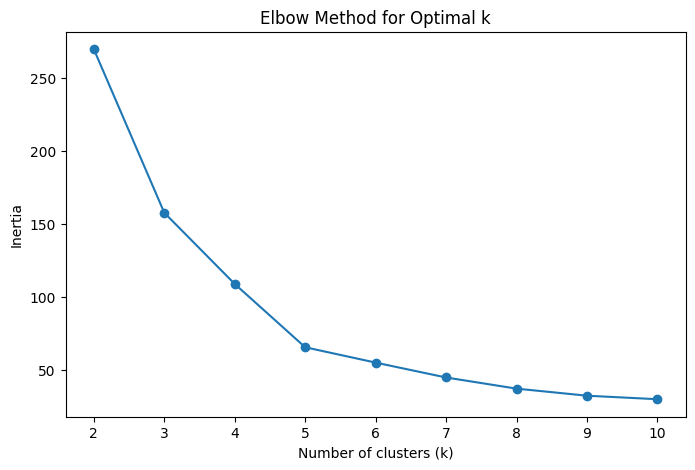

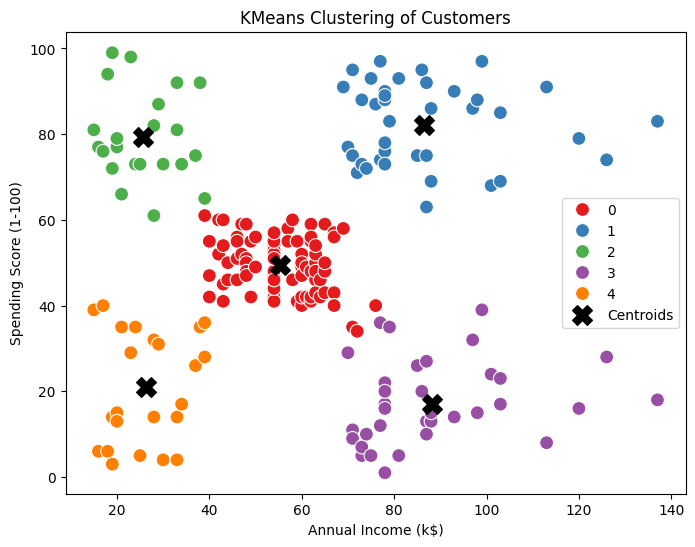


Average Spending per Cluster:
                Annual Income (k$)  Spending Score (1-100)  Count
Cluster_KMeans                                                   
0                        55.296296               49.518519     81
1                        86.538462               82.128205     39
2                        25.727273               79.363636     22
3                        88.200000               17.114286     35
4                        26.304348               20.913043     23


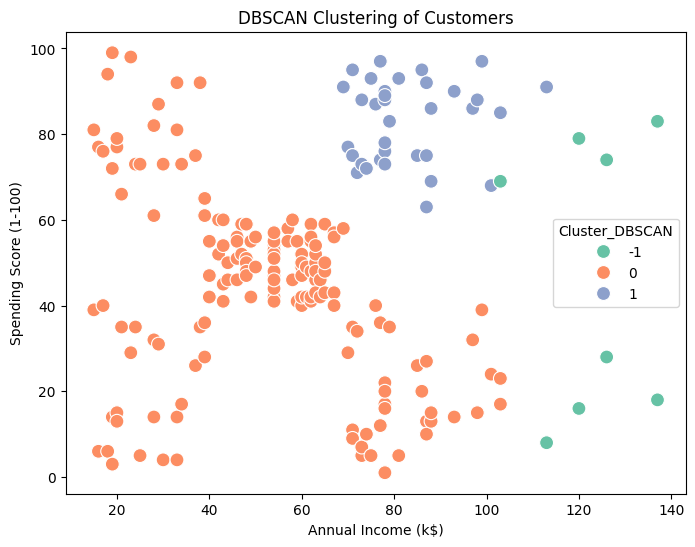


Silhouette Score - KMeans: 0.5546571631111091
Silhouette Score - DBSCAN: 0.35044619989666004


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Load Dataset
df = pd.read_csv("/content/Mall_Customers.csv")
print("Data Shape:", df.shape)
print(df.head())

# Select Features (Income & Spending Score)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method for Optimal k
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# KMeans Clustering
k_opt = 5
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
df['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)

# Visualize KMeans clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=df['Cluster_KMeans'], palette='Set1', s=100)
plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:,0],
            scaler.inverse_transform(kmeans.cluster_centers_)[:,1],
            c='black', marker='X', s=200, label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('KMeans Clustering of Customers')
plt.legend()
plt.show()

# Average Spending per Cluster
cluster_summary = df.groupby('Cluster_KMeans').agg({
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'})
print("\nAverage Spending per Cluster:")
print(cluster_summary)

# DBSCAN (Bonus)
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['Cluster_DBSCAN'] = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=df['Cluster_DBSCAN'], palette='Set2', s=100)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clustering of Customers')
plt.show()

# Silhouette Score Comparison
kmeans_score = silhouette_score(X_scaled, df['Cluster_KMeans'])
dbscan_score = silhouette_score(X_scaled, df['Cluster_DBSCAN']) if len(set(df['Cluster_DBSCAN']))>1 else 'N/A'

print("\nSilhouette Score - KMeans:", kmeans_score)
print("Silhouette Score - DBSCAN:", dbscan_score)
